In [2]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [7]:
import seaborn as sb
import pandas as pd
import kneed
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np

In [3]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [4]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/Data/dielectron.csv"

df= read_file(url)

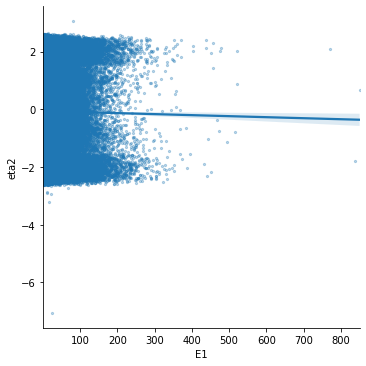

In [11]:
sb.lmplot(x='E1', y='eta2', scatter_kws={"s": 5, 'alpha':0.3}, data=df)

In [5]:
features= df.iloc[:,:18]

In [18]:
features.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1


In [8]:
# scaler = StandardScaler()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [26]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

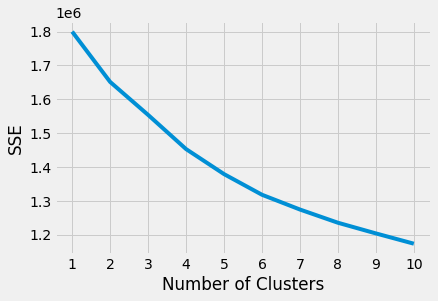

In [27]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [28]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [29]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300
)

In [30]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5)

In [31]:
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

kmeans_silhouette

0.09

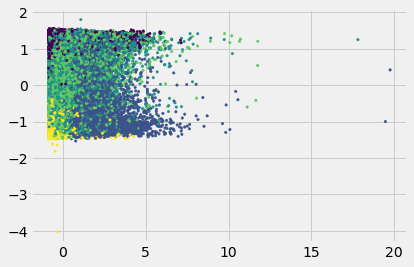

In [32]:
plt.scatter(scaled_features[:, 2], scaled_features[:, 15], s=6,c=kmeans.labels_, cmap='viridis', alpha=1);

## Covariance matrix

<AxesSubplot:>

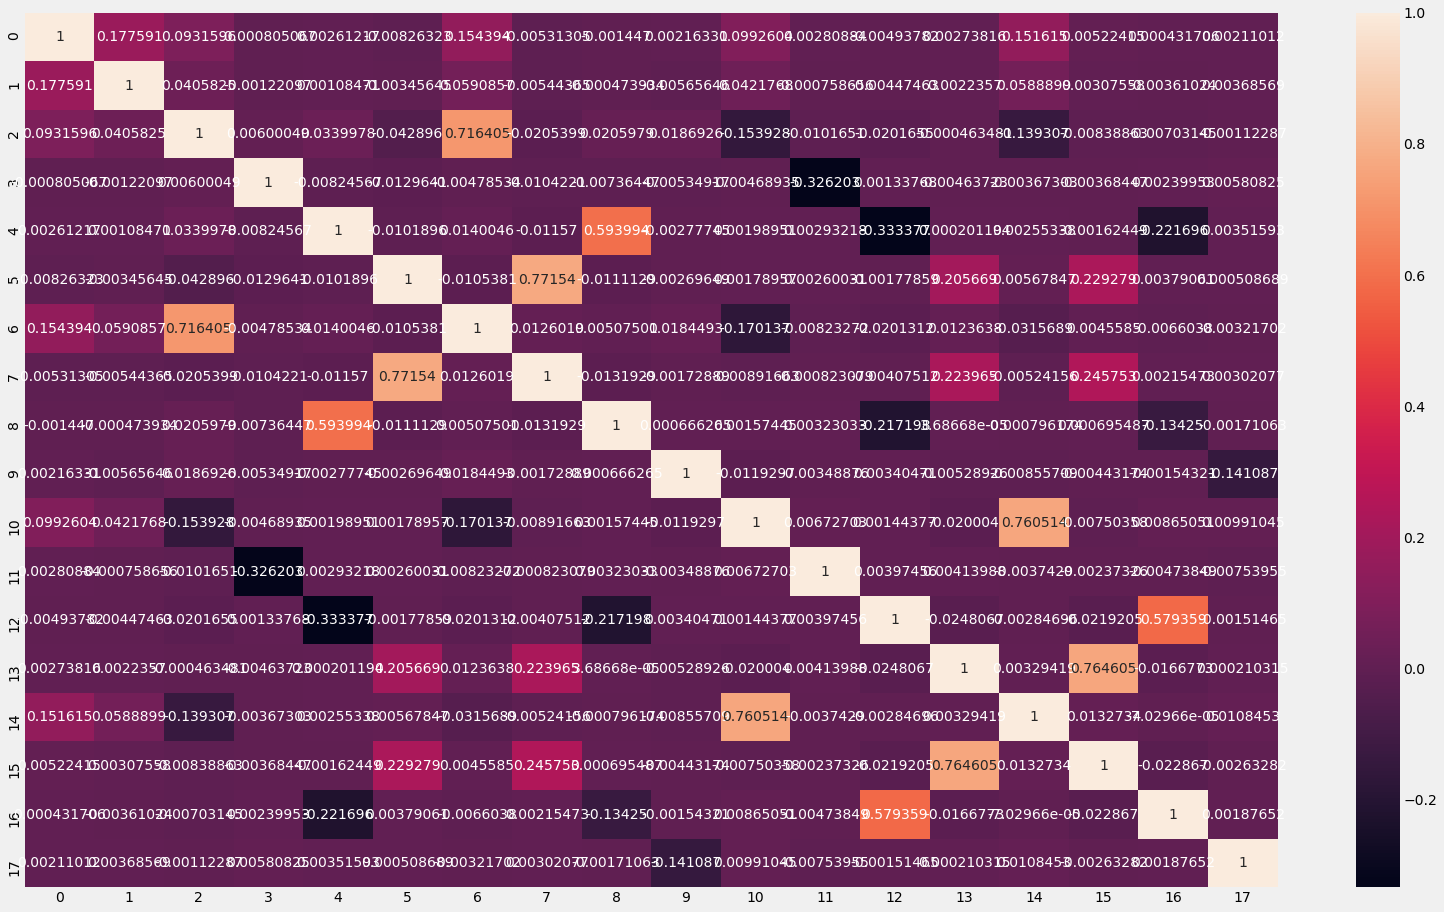

In [39]:
scaled_features_transposed=np.transpose(scaled_features)
covMatrix = np.cov(scaled_features_transposed, bias=True)
plt.figure(figsize = (25,15))
sb.heatmap(covMatrix, annot=True, fmt='g')

<AxesSubplot:>

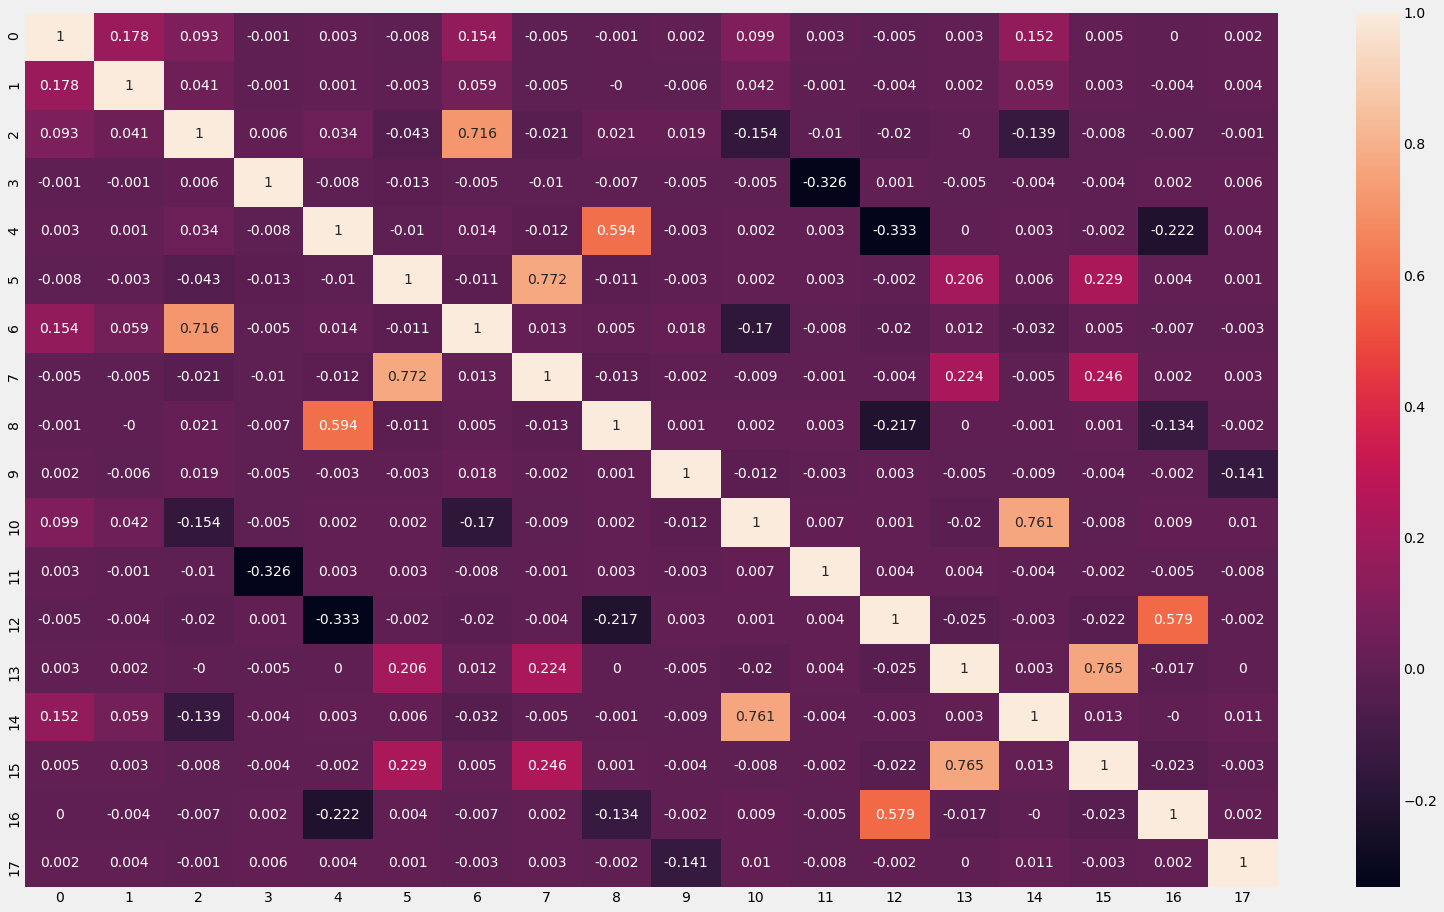

In [40]:
covMatrix_rounded = np.around(covMatrix,decimals=3)
plt.figure(figsize = (25,15))
sb.heatmap(covMatrix_rounded, annot=True, fmt='g')

In [9]:
scaled_features_df = pd.DataFrame(scaled_features)

In [11]:
descrip = scaled_features_df.describe()

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(descrip)

                 0             1             2             3             4   \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   5.074980e-15  6.480150e-17  9.578116e-17 -1.065814e-17 -1.477929e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.547675e+00 -1.227721e+00 -8.748675e-01 -1.870381e+01 -9.373369e+00   
25%   -8.924546e-01 -7.264667e-01 -6.788110e-01 -4.005676e-01 -4.052303e-01   
50%   -6.875171e-03 -2.611529e-01 -3.571299e-01  4.059458e-04 -6.176533e-03   
75%    1.168827e+00  3.421960e-01  3.291655e-01  4.161657e-01  4.057691e-01   
max    1.354635e+00  3.208588e+00  1.975363e+01  1.002641e+01  1.093410e+01   

                 5             6             7             8             9   \
count  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05  1.000000e+05   
mean   3.268497e-18  3.205969e-16  3.261391e-17  3.183231e-17 -4.600764e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.